# GPU bench marking with image classification 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train.shape


(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0:7]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In [11]:
def plot_sample(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_train[index])

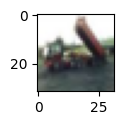

In [12]:
plot_sample(2)

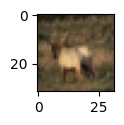

In [13]:
plot_sample(3)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] 

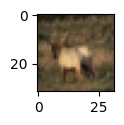

In [15]:
plot_sample(3)

In [16]:
y_train[3]

array([4], dtype=uint8)

In [17]:
classes[y_train[3][0]]

'deer'

In [18]:
y_test.shape

(10000, 1)

# scalling the image

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
X_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [21]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = 'float32'

)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = 'float32')


In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
32*32*3

3072

In [27]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)


In [29]:
y_test[0]

array([3], dtype=uint8)

In [30]:
model.predict(X_test_scaled)[0]

NameError: name 'model' is not defined

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 7s 22ms/step


3

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 9s 29ms/step


'cat'

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 10s 29ms/step - loss: 1.7410 - accuracy: 0.5404


[1.740968108177185, 0.5404000282287598]